In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

# define the path to the images
path = '/home/rei/personal/ds-project/dataset/train/'
# define the size of the images
size = 50
# define the categories
categories = ['lajthiza', 'spring', 'tepelena']
# define the training data
training_data = []

# function to create the training data
def create_training_data():
    for category in categories:
        path_to_category = os.path.join(path, category)
        class_num = categories.index(category)
        for img in os.listdir(path_to_category):
            try:
                img_array = cv2.imread(os.path.join(path_to_category, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (size, size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [6]:
# shuffle the training data
random.shuffle(training_data)

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, size, size, 1)
y = np.array(y)

# save the training data
pickle_out = open('dataset/shrinked/X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('dataset/shrinked/y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

(969, 50, 50, 1)
(969,)
[[[[172]
   [171]
   [172]
   ...
   [181]
   [183]
   [181]]

  [[172]
   [174]
   [172]
   ...
   [182]
   [183]
   [185]]

  [[170]
   [172]
   [170]
   ...
   [184]
   [186]
   [185]]

  ...

  [[117]
   [117]
   [117]
   ...
   [154]
   [155]
   [149]]

  [[115]
   [118]
   [120]
   ...
   [150]
   [140]
   [134]]

  [[105]
   [122]
   [121]
   ...
   [136]
   [137]
   [138]]]


 [[[176]
   [173]
   [176]
   ...
   [187]
   [186]
   [187]]

  [[177]
   [173]
   [181]
   ...
   [192]
   [182]
   [187]]

  [[178]
   [176]
   [176]
   ...
   [193]
   [188]
   [189]]

  ...

  [[154]
   [161]
   [165]
   ...
   [150]
   [157]
   [159]]

  [[156]
   [155]
   [154]
   ...
   [155]
   [144]
   [140]]

  [[154]
   [155]
   [163]
   ...
   [140]
   [151]
   [155]]]


 [[[ 97]
   [100]
   [ 95]
   ...
   [ 86]
   [ 93]
   [ 89]]

  [[ 83]
   [ 97]
   [ 94]
   ...
   [ 88]
   [ 76]
   [ 96]]

  [[ 77]
   [ 92]
   [ 90]
   ...
   [ 90]
   [ 82]
   [ 84]]

  ...

  [[ 5

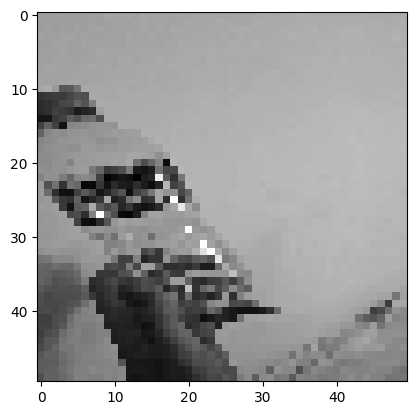

In [7]:
# load the training data
pickle_in = open('dataset/shrinked/X.pickle', 'rb')
X = pickle.load(pickle_in)

pickle_in = open('dataset/shrinked/y.pickle', 'rb')
y = pickle.load(pickle_in)

# print the shape of the training data
print(X.shape)
print(y.shape)

# print the training data
print(X)
print(y)

# show the training data
plt.imshow(X[0], cmap='gray')